In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
N = 100
J0 = 82
J2 = 112
hmin = 1
hsat = 10
c = 1.5
epsilon = 0.1
dt = 0.1
tmax = 20

In [22]:
angles = np.pi / N * np.arange(0, N)
rates_zero = np.zeros(N)
g = lambda h: np.clip((h-hmin)/(hsat-hmin), a_min = 0, a_max = 1)
h_ext = lambda i, t, a=angles: c*(1 - epsilon + epsilon * np.cos(2*(a[i] - t)))
h_i = lambda i, t, r=rates_zero: np.mean((J[i,:] * r).T, axis=0) + h_ext(i, t)
taxis = np.arange(0, tmax, dt)

## Exercise 1

For close angles ($\Delta \theta \approx 0$) we get $ J = -J_0 + J_2 > 0 $, meaning close neurons stimulate each other. For orthogonal neurons ($\Delta \theta \approx \frac{\pi}{2}$) we get $J = -J_0 -J_2 < 0$, meaning these neurons inhibit each other. For neurons $\pi$ degrees apart, we get the same response as for neurons that are very close.

This is similar to center-on, surround-off cells - these cells are stimulated by light at the center (close by) and inhibited by light in the surround area (far away).

## Exercise 2

In [7]:
J = -J0 + J2 * np.cos(2*(angles[None].T - angles))

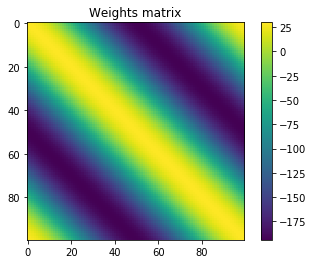

In [37]:
plt.imshow(J)
plt.title("Weights matrix")
plt.colorbar()
plt.show()

Symmetry is reflected by the diagonal lines of the same color

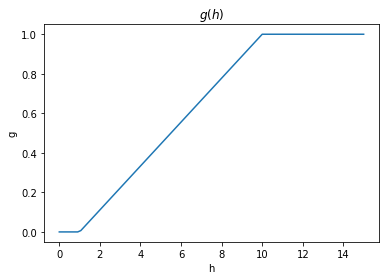

In [44]:
h = np.linspace(0, 15, 100)
plt.plot(h, g(h))
plt.title("$g(h)$")
plt.xlabel('h')
plt.ylabel('g')
plt.show()

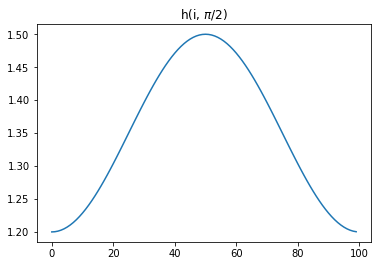

In [23]:
plt.plot(range(N), h_i(range(N), np.pi/2))
plt.title("h(i, $\pi / 2$)")
plt.show()

## Exercise 3

In [24]:
dr = lambda theta, r: -r + g(h_i(range(N), theta, r=r))

In [25]:
from simulate_euler import simulate
from functools import partial

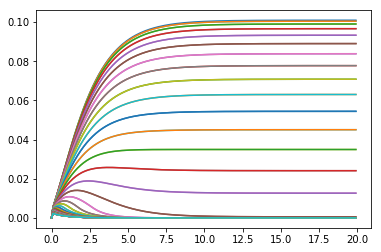

In [26]:
plt.plot(taxis, simulate(partial(dr, np.pi/2), np.zeros(N), dt, tmax))
plt.show()

# Exercise 4

In [18]:
def piecewise_simulate(t_ext, t_before, t_after):
    part_1 = simulate(partial(dr, t_before), np.zeros(N), dt, t_ext)
    part_2 = simulate(partial(dr, t_after), part_1[-1, :], dt, tmax - t_ext)
    
    return np.concatenate([part_1, part_2])

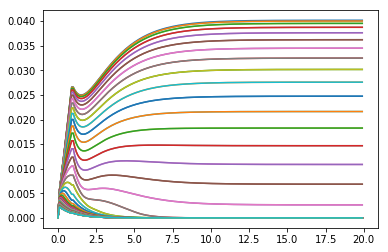

In [19]:
plt.plot(taxis, piecewise_simulate(1, np.pi/2, 0))
plt.show()

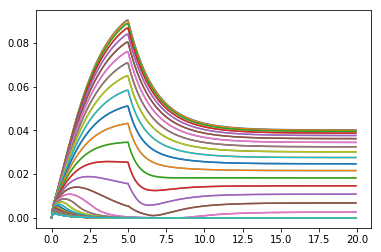

In [20]:
plt.plot(taxis, piecewise_simulate(5, np.pi/2, 0))
plt.show()

## Exercise 5

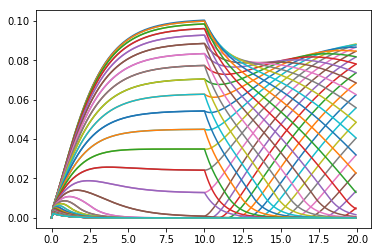

In [21]:
plt.plot(taxis, piecewise_simulate(10, np.pi/2, np.pi/4))
plt.show()